In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd ../gdrive/MyDrive/ImageProcClass

Mounted at /gdrive
/gdrive/MyDrive/ImageProcClass


#MO4 - CH02

이미지 읽기
- Grayscale
- Color

하부구조로의 분해
- Color -> b, g, r channels, 1/3 channel image -> roi, pixel getting and setting using ndarray level operation
- 각 객체의 image 정보를 표현하는 자료구조 및 접근 방법

Numpy 관련 테크닉 필히 숙지

Python 관련 테크닉 필히 숙지

(600, 487, 3)
876600
uint8


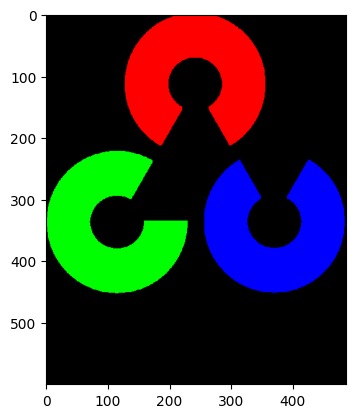

In [ ]:
import cv2

img = cv2.imread('Dongkeun-OpenCV-ImgData/logo.png')
print(img.shape)
print(img.size)
print(img.dtype)

import matplotlib.pyplot as plt
image_out = img[:,:,::-1]
plt.imshow(image_out)
plt.show()

(600, 487)
292200
uint8


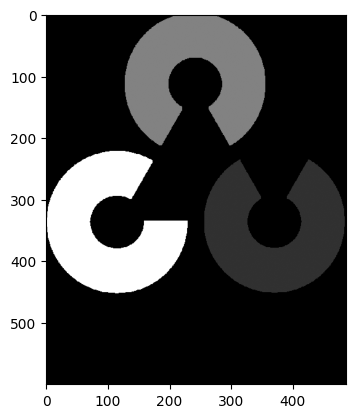

In [ ]:
import cv2

gr_img = cv2.imread('Dongkeun-OpenCV-ImgData/logo.png', cv2.IMREAD_GRAYSCALE)
print(gr_img.shape)
print(gr_img.size)
print(gr_img.dtype)

import matplotlib.pyplot as plt

plt.imshow(gr_img, cmap='gray')
plt.show()

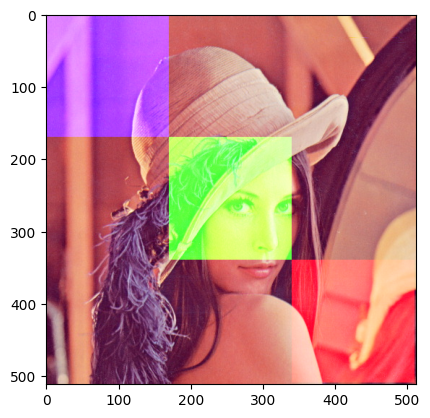

In [ ]:
import cv2

img = cv2.imread('Dongkeun-OpenCV-ImgData/lena.jpg')

img[img.shape[0]//3*0:img.shape[0]//3*1, img.shape[1]//3*0:img.shape[1]//3*1, 0] = 255
img[img.shape[0]//3*1:img.shape[0]//3*2, img.shape[1]//3*1:img.shape[1]//3*2, 1] = 255
img[img.shape[0]//3*2:img.shape[0]//3*3, img.shape[1]//3*2:img.shape[1]//3*3, 2] = 255


import matplotlib.pyplot as plt
image_out = img[:,:,::-1]
plt.imshow(image_out)
plt.show()

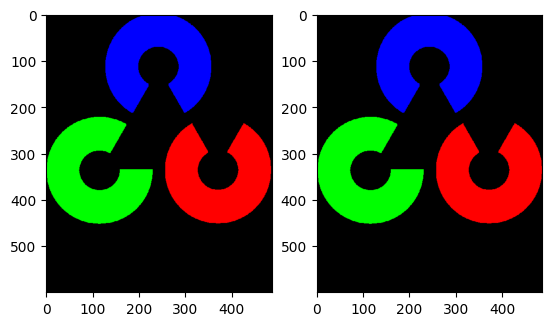

In [ ]:
img = cv2.imread('Dongkeun-OpenCV-ImgData/logo.png')
plt.subplot(121)
plt.imshow(img)

b, g, r = cv2.split(img)
#img_m = cv2.merge([r,g,b])
img_m = np.stack([b,g,r], axis=2)

plt.subplot(122)
plt.imshow(img_m)

plt.show()


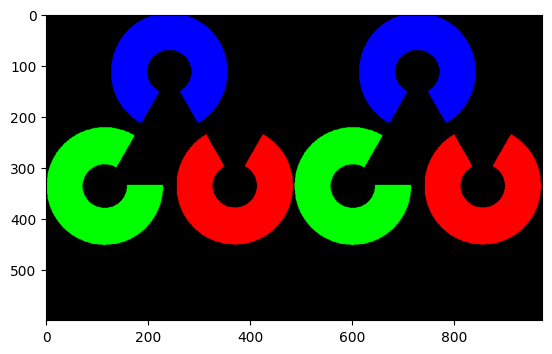

In [ ]:
import numpy as np

img_concat = np.concatenate((img, img_m), axis=1)

plt.imshow(img_concat)
plt.show()

#MO4 - CH04

Drawing Shapes

Writing text

Advanced drawing

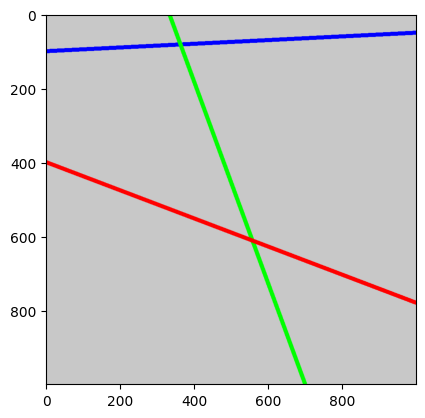

In [ ]:
bg = np.zeros((1000,1000,3), dtype="uint8")

bg[:] = (200,200,200)

#(x,y) 순서네요
cv2.line(bg, (0,100),(1000,50), (255,0,0), 10)
cv2.line(bg, (333,0),(700,1000), (0,255,0), 10)
cv2.line(bg, (0,400),(1000,780), (0,0,255), 10)

image_out = bg[:,:,::-1]
plt.imshow(image_out)
plt.show()

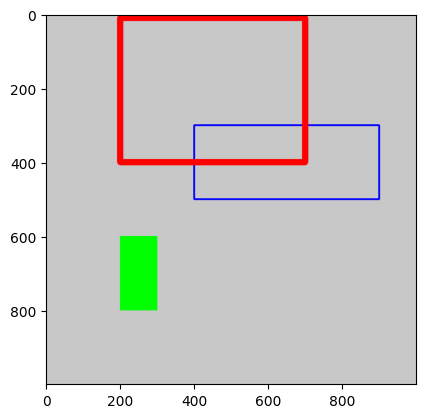

In [ ]:
bg = np.zeros((1000,1000,3), dtype="uint8")

bg[:] = (200,200,200)

cv2.rectangle(bg, (400,500), (900,300), (255,0,0), 3)
cv2.rectangle(bg, (200,600), (300,800), (0,255,0), -1)
cv2.rectangle(bg, (700,400), (200,10), (0,0,255), 15)

image_out = bg[:,:,::-1]
plt.imshow(image_out)
plt.show()

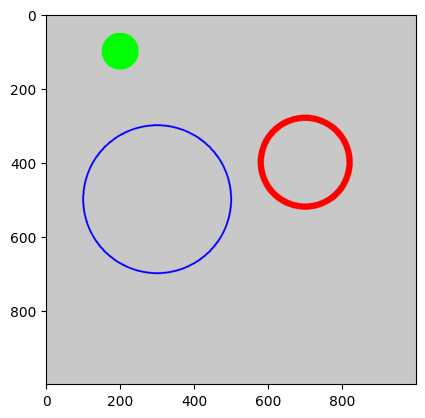

In [ ]:
bg = np.zeros((1000,1000,3), dtype="uint8")

bg[:] = (200,200,200)

cv2.circle(bg, (300,500), 200, (255,0,0), 3)
cv2.circle(bg, (200,100), 50, (0,255,0), -1)
cv2.circle(bg, (700,400), 120, (0,0,255), 15)

image_out = bg[:,:,::-1]
plt.imshow(image_out)
plt.show()

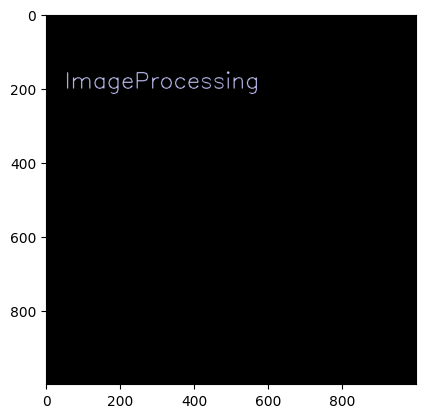

In [ ]:
bg = np.zeros((1000,1000,3), dtype="uint8")

bg[:] = (0,0,0)

cv2.putText(bg, "ImageProcessing", (50,200), 0, 2, (255,200,200), 2)

image_out = bg[:,:,::-1]
plt.imshow(image_out)
plt.show()

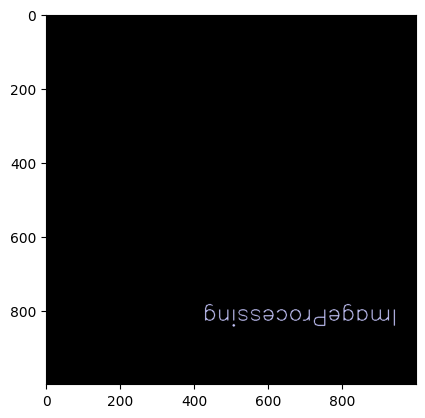

In [ ]:
bg = np.zeros((1000,1000,3), dtype="uint8")

bg[:] = (0,0,0)

cv2.putText(bg, "ImageProcessing", (50,200), 0, 2, (255,200,200), 2)

bg = bg[::-1,::-1,:]

image_out = bg[:,:,::-1]
plt.imshow(image_out)
plt.show()

# DK - CH04

Image Properties and Pixels

Region of Interest(ROI)

Copy of an image

Splitting and merging channels
- Numpy level, cv2 function level

Image Operation: Arithmetic, Bit, Comparison, Mathematical
- Numpy level, cv2 function level
- Mask utilization with multiple steps

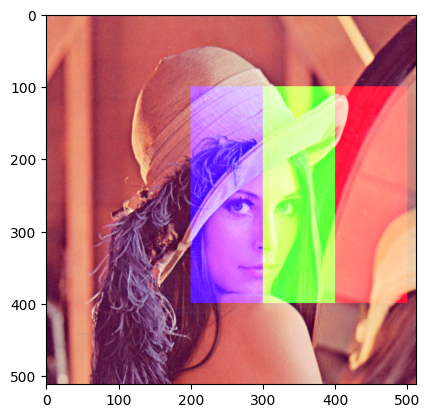

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Dongkeun-OpenCV-ImgData/lena.jpg')

img[100:400, 200:300, 0] = 255
img[100:400, 300:400, 1] = 255
img[100:400, 400:500, 2] = 255

image_out = img[:,:,::-1]
plt.imshow(image_out)
plt.show()

(600, 487, 3) (600, 487, 3)


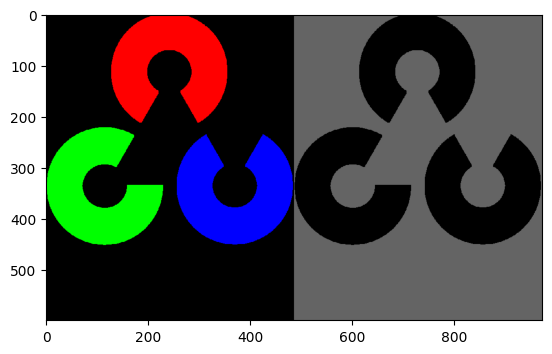

In [ ]:
lena = np.zeros((800,800,3), dtype="uint8")
lena[:] = 100
logo = cv2.imread('Dongkeun-OpenCV-ImgData/logo.png')

lena = lena[0:logo.shape[0], 0:logo.shape[1]]

print(lena.shape, logo.shape)

mask = cv2.threshold(logo, 1, 255, cv2.THRESH_BINARY)[1]
mask = cv2.split(mask)

front = cv2.bitwise_or(mask[0],mask[1])
front = cv2.bitwise_or(mask[2],front)
back = cv2.bitwise_not(front)

foreg = cv2.bitwise_and(logo, logo, mask=front)
backg = cv2.bitwise_and(lena, lena, mask=back)

img = np.concatenate((foreg, backg), axis=1)

image_out = img[:,:,::-1]
plt.imshow(image_out)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def colorprint(img):
  image_out = img[:,:,::-1]
  plt.imshow(image_out)
  plt.show()

def justprint(img):
  plt.imshow(img, cmap='gray')
  plt.show()

lena_img = cv2.imread("Dongkeun-OpenCV-ImgData/lena.jpg")
lena_img = cv2.resize(lena_img, (600,600))
logo_img = cv2.imread("Dongkeun-OpenCV-ImgData/logo.png")
logo_img = cv2.resize(logo_img, (600,600))

logo_img = cv2.threshold(logo_img, 1, 255, cv2.THRESH_BINARY)[1]
mask = cv2.split(logo_img)

front = cv2.bitwise_and(lena, lena, mask=mask)


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - mask is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'mask'


# JB - CH04

4.3 그리기 함수

4.4 영상파일 처리

4.6 Matplotlib 패키지 활용

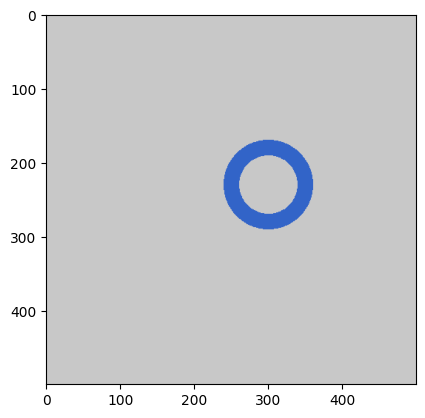

In [ ]:
import numpy as np

img = np.zeros((500,500,3), dtype='uint8')
img[:] = 200
cv2.circle(img, (300,230), 50, (200,100,50), 20)

image_out=img[:,:,::-1]
plt.imshow(image_out)
plt.show()

#JB - CH05

5.1 기본 배열(Array) 처리 함수
- Cv2 함수는 풀어서 np 레벨로 작성할 수 있어야 함.
5.2 채널 처리 함수

5.3 산술 연산 함수
- 사칙연산
- 논리비트연산
- Threshold 함수
5.4 원소의 절댓값 연산

5.5 통계 관련 함수
- 기본적인 함수만 이해 및 활용
5.6 행렬 연산 함수

In [ ]:
masks = cv2.threshold(logo, 1, 255, cv2.THRESH_BINARY)[1]
#masks = cv2.split(masks)

img = cv2.imread('Dongkeun-OpenCV-ImgData/lena.jpg')

cv2.bitwise_or(img, mask)

image_out=img[:,:,::-1]
plt.imshow(image_out)
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


#JB - CH06

6.1 영상 화소의 접근

6.2 화소 밝기 변환

6.3 히스토그램


In [ ]:
def calc_histo(image, hsize, ranges=[0,256]):
  hist = np.zeros((hsize,1), np.float32)
  gap = ranges[1] / hsize

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      idx = int(image.item(i,j) / gap)
      hist[idx] += 1

  return hist